Import packages.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('../../final_result_impl_matrixmul.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

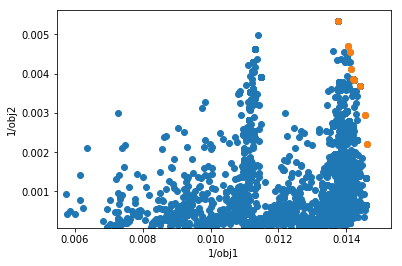

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0002606797751353443


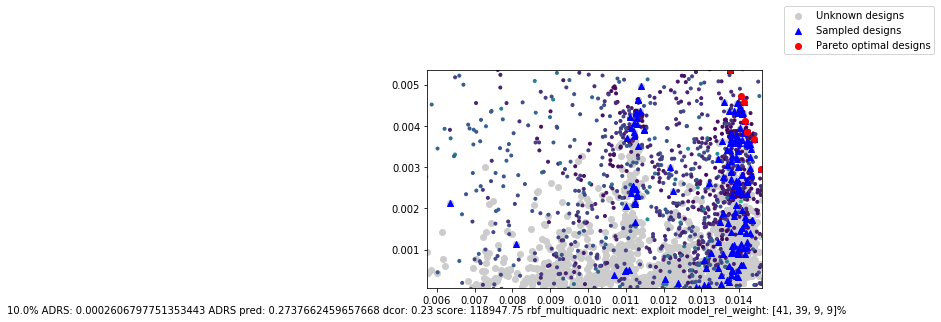

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.1),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([ 923, 1060, 1698, 2071, 1115, 1979,    0,    1,  376,  384,  768,
       1152,  769,  770,  771,   63, 1156, 1860,  327,  772, 1921, 1917,
        773, 1916, 2299,  391,  774, 1796, 2172,  775, 1789,  837, 2179,
        388,  899, 1537,  390, 1159,  782,  386,  833,  776,  387,  385,
        779, 1852,  389,    7, 1845,  839, 2124, 1153,  320, 1923, 1536,
        854, 1853,  832,  849,  256,  838,  787,  781,  840, 1048,    4,
        835,    6,    2,    5,  834, 1901,   64,  312, 1158, 1726,  704,
       2236, 1471, 1472, 1479, 1495, 1088, 1662, 1154,  328, 1407, 1415,
       1868, 1534,  264, 1781,  240, 1980,    3, 1215,  841,  248,  836,
        783,  780, 1399,  448,  449, 2051, 1727,  896,  960,  512, 1089,
        576, 1972, 1414, 1406,  192, 1733, 1208,  831,  639, 1590, 1016,
       1478,  992, 1797, 1344, 1462, 1351, 2244,  128,  975,  904, 1157,
        383,  319,  304, 1095,   65,   66,  263, 1155, 1565,  784, 1805,
       2228,  778,  271, 1598,  777, 1216,  129,  1